<a href="https://colab.research.google.com/github/nucontreras/artificial-intelligence-scripts/blob/main/FSCN/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><FONT size="8" color='264653'>Audiographics Project: sonification for the accessibility of quantitative information in graphic format </FONT>

><b><FONT size="3" color='DimGray'> Sonification for the accessibility of quantitative information in graphic format is part of the research line in Technology and Care of the Millennium Institute for Care Research ([MICARE](https://www.micare.cl/)). The objective of this project is to implement a tool for the transformation of quantitative information presented in visual form into audio to facilitate access to visually handicapped people, using sonification techniques and image analysis through artificial intelligence. </FONT>

><b><FONT size="3" color='DimGray'> This file contains the data analysis of the project. </FONT>

# <b><FONT size="5" color='MidnightBlue '>Connection to Google Drive </FONT>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd 'gdrive/MyDrive/AudioGraphs'

Mounted at /content/gdrive
/content/gdrive/MyDrive/AudioGraphs


# <b><FONT size="5" color='MidnightBlue '>Import of packages </FONT>



In [4]:
import os
import sys
import numpy as np
from random import shuffle, sample

# Data processing and visualization
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import cv2

#<b><FONT color='MidnightBlue' size='6'>Functions</FONT></b>

In [30]:
def bold(string):
    return '\033[1m' + string + '\033[0m'

In [23]:
def plot_table(frame, title=None):
    fig = plt.figure(figsize=(8, 1))
    ax = fig.add_subplot(111)

    ax.table(cellText = my_frame.values,
            rowLabels = my_frame.index,
            colLabels = my_frame.columns,
            loc = "center"
            )
    if title:
        ax.set_title(title)

    ax.axis("off")

#<b><FONT color='MidnightBlue' size='6'>Classes</FONT></b>

In [120]:
class PathImages:
    def __init__(self, path, imgs, n_imgs, extensions):
        self.path = path
        self.imgs = imgs
        self.n_imgs = n_imgs
        self.extensions = extensions

    def show_images_horizontally(self, n=6, random=False):
        imgs_selected = dict()
        # Verify if n is less than 12
        if n > 12:
            print("n has to be less than 12.")
            return
        # Find images
        if random:
            ids_random = random.sample(range(len(self.imgs)), n)

            for i in ids_random:
                imgs_selected[self.imgs[i]] = path_ + self.imgs[i]
        else:
            path_ = self.path + "/" if self.path[-1] != "/" else self.path  # adding / if necessary
            for i in range(n):
                imgs_selected[self.imgs[i]] = path_ + self.imgs[i]

        title_fontsize = 'x-small'
        fig = figure(figsize=(30, 10))

        number_of_files = len(imgs_selected.items())
        i = 0
        for img_name, img_path in imgs_selected.items():
            a = fig.add_subplot(1, number_of_files, i+1)
            image = imread(img_path)
            imshow(image, cmap='Greys_r')
            a.set_title(img_name, fontsize=title_fontsize)
            axis('off')
            i += 1

    def __str__(self):
        return f"The path     {bold(self.path):110s} have {self.n_imgs:5} images of {self.extensions} extension.\n"

    def __repr__(self):
        return f"{bold(self.path):110s}  {self.n_imgs:5}  {self.extensions:4s}\n"


class DataBase:
    def __init__(self, rootdir):
        self.rootdir = rootdir
        self.paths_info = dict()
        self.load_paths()

    def load_imgs(self, path):
        extensions = ('.png', '.jpg', '.jpeg')
        imgs_list = list()
        imgs_list_tmp = os.listdir(path)
        extensions_used = set()
        for file in imgs_list_tmp:  # TODO: optimize complexity
            if file.endswith(extensions):
                imgs_list.append(file)
                extensions_used.add(file.split(".")[-1])
        return imgs_list, len(imgs_list), extensions_used

    def load_paths(self):
        subdirs = [x[0] for x in os.walk(self.rootdir)]

        for sub_dir in subdirs:
            imgs, n_imgs, imgs_path_extension_set = self.load_imgs(sub_dir)
            if imgs:
                extensions_string = ', '.join(set(imgs_path_extension_set))
                self.paths_info[sub_dir] = PathImages(sub_dir, imgs, n_imgs, extensions_string)

    def __str__(self):
        information = ""
        for path, content in self.paths_info.items():
            # print(f"The path     {bold(path)} have {content.n_imgs} images of {content.extensions} extension.")
            information += f"The path     {bold(path):110s} have {content.n_imgs:5} images of {content.extensions} extension.\n"
        return information

    def __repr__(self):
        information = ""
        for path, content in self.paths_info.items():
            information += f"{bold(path):110s}  {content.n_imgs:5}  {content.extensions:4s}\n"
        return information




In [121]:
root_dir_bar_charts_old_db = 'Codigos y BD anteriores/Barras'
hola = DataBase(root_dir_bar_charts_old_db)

hola

Codigos y BD anteriores/Barras/ejemplos/internet/regulares                                                  6  jpg 
Codigos y BD anteriores/Barras/ejemplos/internet/buenos                                                    22  jpg 
Codigos y BD anteriores/Barras/ejemplos/internet/malos                                                     14  jpg 
Codigos y BD anteriores/Barras/ejemplos/python/buenos                                                      13  png 
Codigos y BD anteriores/Barras/ejemplos/python/malos                                                       13  png 
Codigos y BD anteriores/Barras/ejemplos/python/regulares                                                    6  png 
Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/binarias                               1000  png 
Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/grises                                 1000  png 
Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/color 

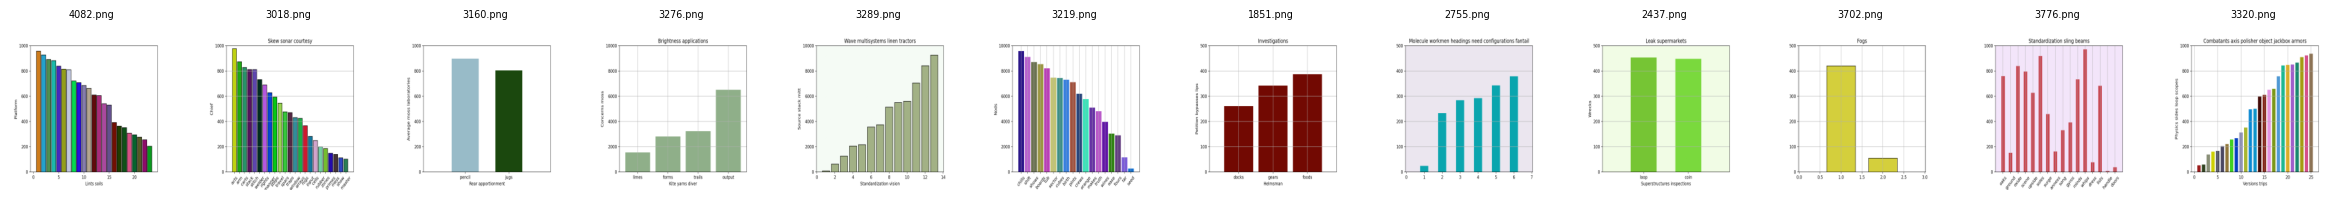

In [123]:
hola2 = hola.paths_info["Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/color"]
hola2.show_images_horizontally(12)


<b></b>

# <b><FONT size="7" color='MidnightBlue '>Old Database </FONT>


## <b><FONT size="6" color='MidnightBlue '>Bar Chart </FONT>

### <b><FONT size="5" color='MidnightBlue '>All bar chart paths and amount of data </FONT>

In [125]:
root_dir_bar_charts_old_db = 'Codigos y BD anteriores/Barras'
bar_charts_old_db = DataBase(root_dir_bar_charts_old_db)

In [126]:
print(bar_charts_old_db)

The path     Codigos y BD anteriores/Barras/ejemplos/internet/regulares                                             have     6 images of jpg extension.
The path     Codigos y BD anteriores/Barras/ejemplos/internet/buenos                                                have    22 images of jpg extension.
The path     Codigos y BD anteriores/Barras/ejemplos/internet/malos                                                 have    14 images of jpg extension.
The path     Codigos y BD anteriores/Barras/ejemplos/python/buenos                                                  have    13 images of png extension.
The path     Codigos y BD anteriores/Barras/ejemplos/python/malos                                                   have    13 images of png extension.
The path     Codigos y BD anteriores/Barras/ejemplos/python/regulares                                               have     6 images of png extension.
The path     Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/binarias 

### <b><FONT size="5" color='MidnightBlue '>Important Paths </FONT>

In [127]:
# 5000 images python training
bar_segm_2_train_color_old_db = bar_charts_old_db.paths_info['Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/color']

# 1000 images python testing
bar_segm_2_test_color_old_db = bar_charts_old_db.paths_info['Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/color']

# 544 images real-world testing
bar_internet_0_originales_old_db = bar_charts_old_db.paths_info['Codigos y BD anteriores/Barras/models/dataset/internet/0_originales']
bar_internet_old_db = bar_charts_old_db.paths_info['Codigos y BD anteriores/Barras/models/dataset/DB graficos internet']

I'm not sure what 544-image dataset they used for testing.

### <b><FONT size="5" color='MidnightBlue '>Data visualization </FONT>

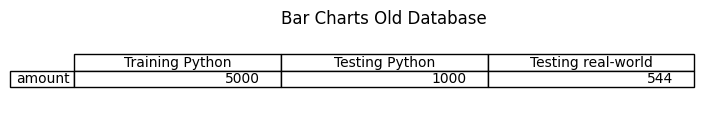

In [128]:
my_frame = pd.DataFrame(data={'Training Python':[bar_segm_2_train_color_old_db.n_imgs],
                              'Testing Python':[bar_segm_2_test_color_old_db.n_imgs],
                              'Testing real-world':[bar_internet_0_originales_old_db.n_imgs]},
                        index=['amount'])
title = "Bar Charts Old Database"
# Display pandas table
plot_table(my_frame, title= title)


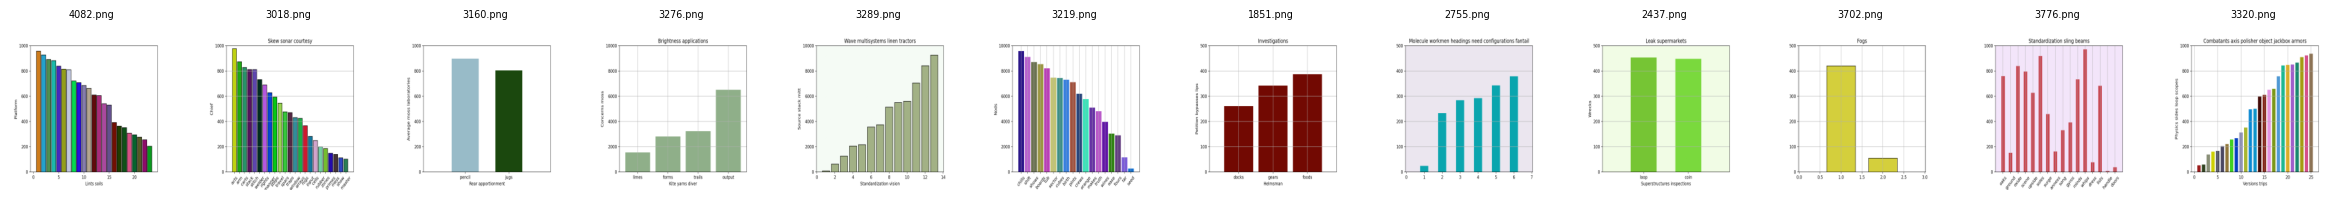

In [129]:
# 5000 images python training

bar_segm_2_train_color_old_db.show_images_horizontally(12)

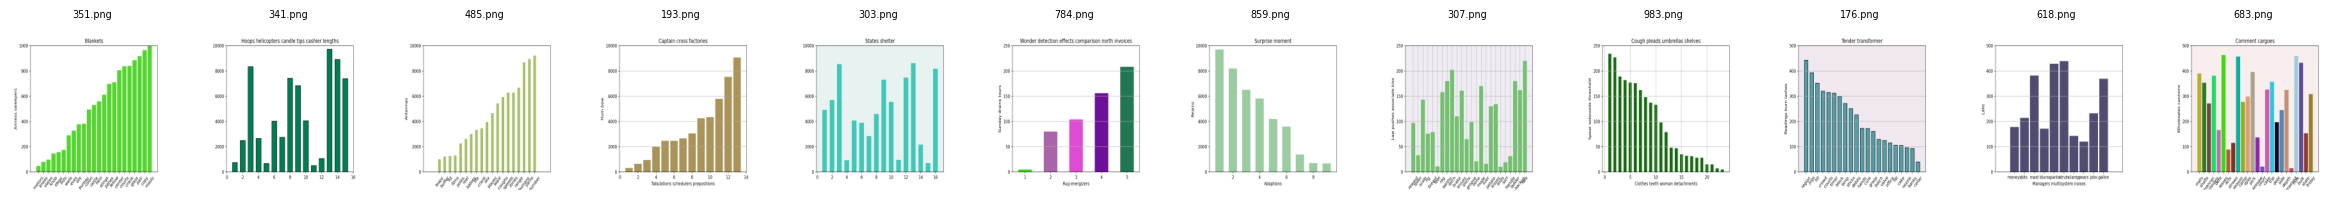

In [130]:
# 1000 images python testing

bar_segm_2_test_color_old_db.show_images_horizontally(12)

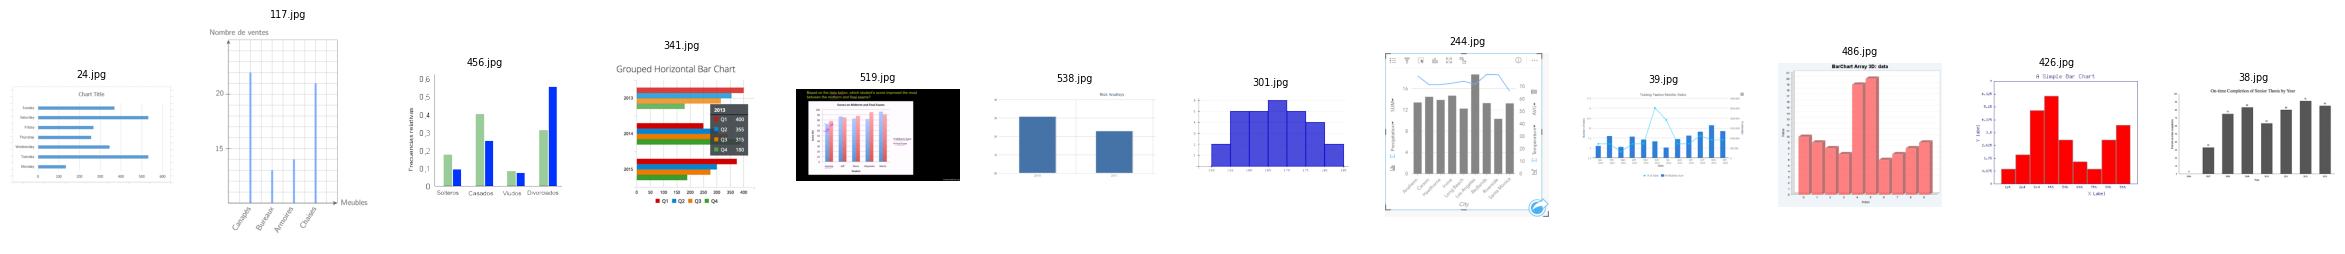

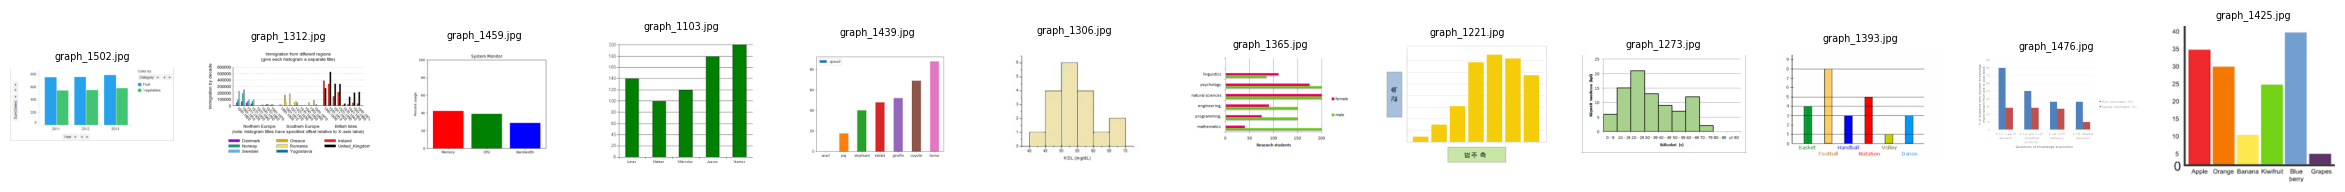

In [131]:
# 544 images real-world testing

bar_internet_0_originales_old_db.show_images_horizontally(12)
bar_internet_old_db.show_images_horizontally(12)

## <b><FONT size="6" color='MidnightBlue '>Line Chart </FONT>

### <b><FONT size="5" color='MidnightBlue '>All line chart paths and amount of data </FONT>

In [133]:
root_dir_line_charts_old_db = 'Codigos y BD anteriores/Lineas/test_procesado'
line_charts_old_db = DataBase(root_dir_line_charts_old_db)

In [134]:
print(line_charts_old_db)

The path     Codigos y BD anteriores/Lineas/test_procesado/matlab/pred                                              have  1000 images of png extension.
The path     Codigos y BD anteriores/Lineas/test_procesado/matlab/out_onepixel                                      have  1000 images of png extension.
The path     Codigos y BD anteriores/Lineas/test_procesado/matlab/out                                               have  1000 images of png extension.
The path     Codigos y BD anteriores/Lineas/test_procesado/matlab/test/graficos-full                                have  1000 images of png extension.
The path     Codigos y BD anteriores/Lineas/test_procesado/matlab/test/graficos-solo                                have  1000 images of png extension.
The path     Codigos y BD anteriores/Lineas/test_procesado/python/out                                               have   999 images of png extension.
The path     Codigos y BD anteriores/Lineas/test_procesado/python/out_onepixel          

### <b><FONT size="5" color='MidnightBlue '>Important Paths </FONT>

In [135]:
# 1000 Matlab testing
line_matlab_test_graficosfull_old_db = line_charts_old_db.paths_info['Codigos y BD anteriores/Lineas/test_procesado/matlab/test/graficos-full']

# 999 Python images testing
line_python_test_graficosfull_old_db = line_charts_old_db.paths_info['Codigos y BD anteriores/Lineas/test_procesado/python/test/graficos-full']

# 544 Real-world images testing
line_realnew_test_graficosfull_old_db =line_charts_old_db.paths_info['Codigos y BD anteriores/Lineas/test_procesado/real_new/test/graficos-full']

There is no dataset with 4000 Matlab images and 240 real-world images for training.

### <b><FONT size="5" color='MidnightBlue '>Data visualization </FONT>

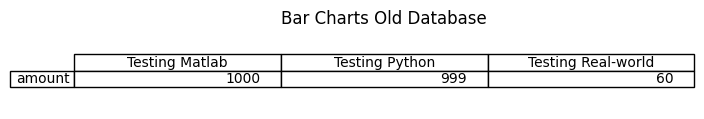

In [136]:
my_frame = pd.DataFrame(data={'Testing Matlab':[line_matlab_test_graficosfull_old_db.n_imgs],
                              'Testing Python':[line_python_test_graficosfull_old_db.n_imgs],
                              'Testing Real-world':[line_realnew_test_graficosfull_old_db.n_imgs]},
                        index=['amount'])
title = "Bar Charts Old Database"
#my_frame Display pandas table
plot_table(my_frame, title= title)


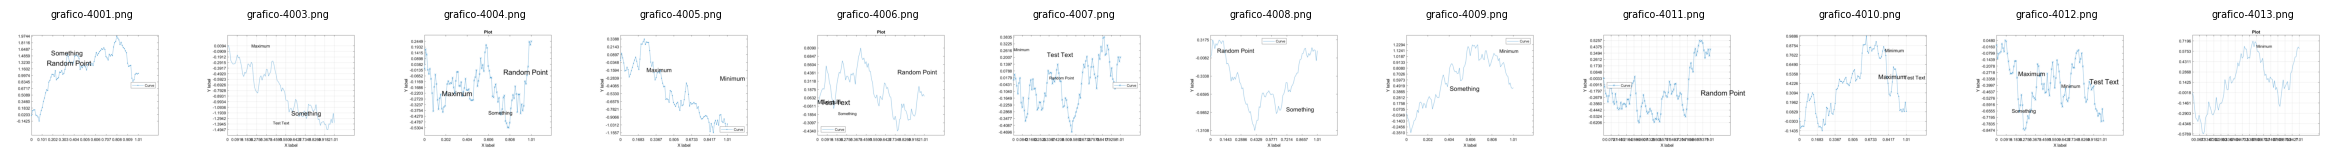

In [41]:
# 1000 Matlab testing

line_matlab_test_graficosfull_old_db.show_images_horizontally(12)

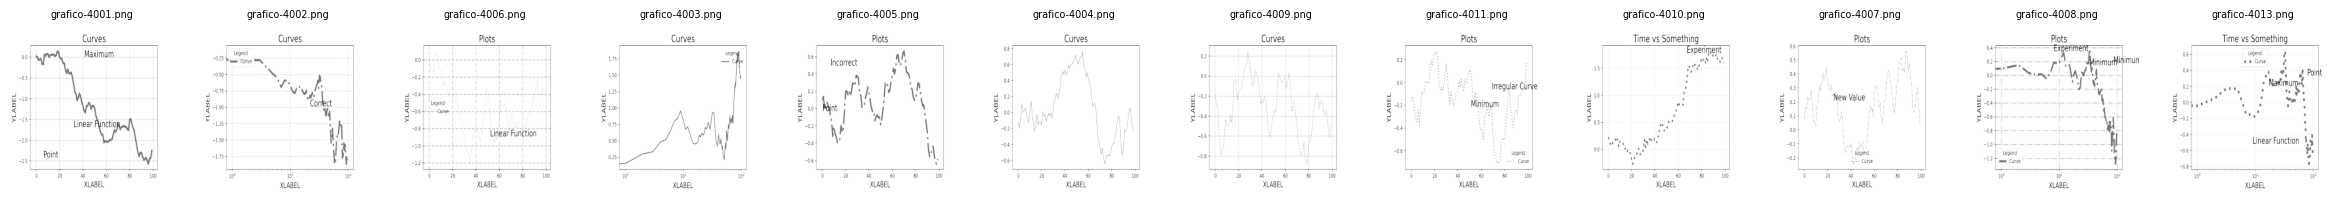

In [137]:
# 1000 Python images testing

line_python_test_graficosfull_old_db.show_images_horizontally(12)

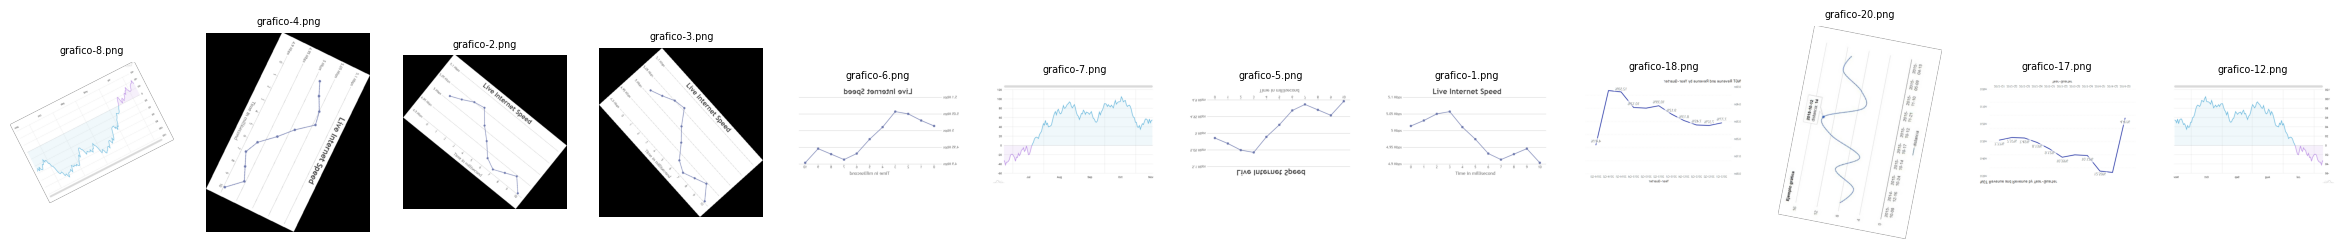

In [138]:
# 544 Real-world images testing

line_realnew_test_graficosfull_old_db.show_images_horizontally(12)

<b></b>

# <b><FONT size="7" color='MidnightBlue '>New Database </FONT>


### <b><FONT size="5" color='MidnightBlue '>Data Base Path</FONT>

In [144]:
root_dir_new_db = 'Data Base'
new_db = DataBase(root_dir_new_db)

### <b><FONT size="5" color='MidnightBlue '>Paths and amount of data </FONT>

In [145]:
print(new_db)

The path     Data Base/Recortadas/v_bar_chart                                                                       have   500 images of jpg extension.
The path     Data Base/Recortadas/pie_chart                                                                         have   500 images of png, jpg extension.
The path     Data Base/Recortadas/h_bar_chart                                                                       have   500 images of jpg extension.
The path     Data Base/Recortadas/line_chart                                                                        have   500 images of jpg extension.
The path     Data Base/Originales/original_images_pie_chart                                                         have   500 images of png, jpg extension.
The path     Data Base/Originales/original_images_bar_chart/vertical                                                have   500 images of jpg extension.
The path     Data Base/Originales/original_images_bar_chart/horizontal        

## <b><FONT size="6" color='MidnightBlue '>Bar Chart </FONT>

### <b><FONT size="5" color='MidnightBlue '>Important Paths </FONT>

In [146]:
# Originals
original_v_bar_new_db = new_db.paths_info["Data Base/Originales/original_images_bar_chart/vertical"]
original_h_bar_new_db = new_db.paths_info["Data Base/Originales/original_images_bar_chart/horizontal"]

# Augmented
augmented_bar_new_db = new_db.paths_info["Data Base/Augmented/bar_chart"]

# Cropped
cropped_v_bar_new_db = new_db.paths_info["Data Base/Recortadas/v_bar_chart"]
cropped_h_bar_new_db = new_db.paths_info["Data Base/Recortadas/h_bar_chart"]

### <b><FONT size="5" color='MidnightBlue '>Data visualization </FONT>

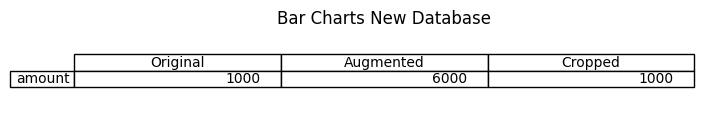

In [148]:
# Calculation of the total number of images
n_total_orig_bar = original_v_bar_new_db.n_imgs + original_h_bar_new_db.n_imgs
n_total_augm_bar = augmented_bar_new_db.n_imgs
n_total_cropped_bar = cropped_v_bar_new_db.n_imgs + cropped_h_bar_new_db.n_imgs

# Creation of the dataframe with the data
my_frame = pd.DataFrame(data={'Original':[n_total_orig_bar],
                              'Augmented':[n_total_augm_bar],
                              'Cropped':[n_total_cropped_bar]},
                        index=['amount'])
title = "Bar Charts New Database"

# Display pandas table
plot_table(my_frame, title= title)


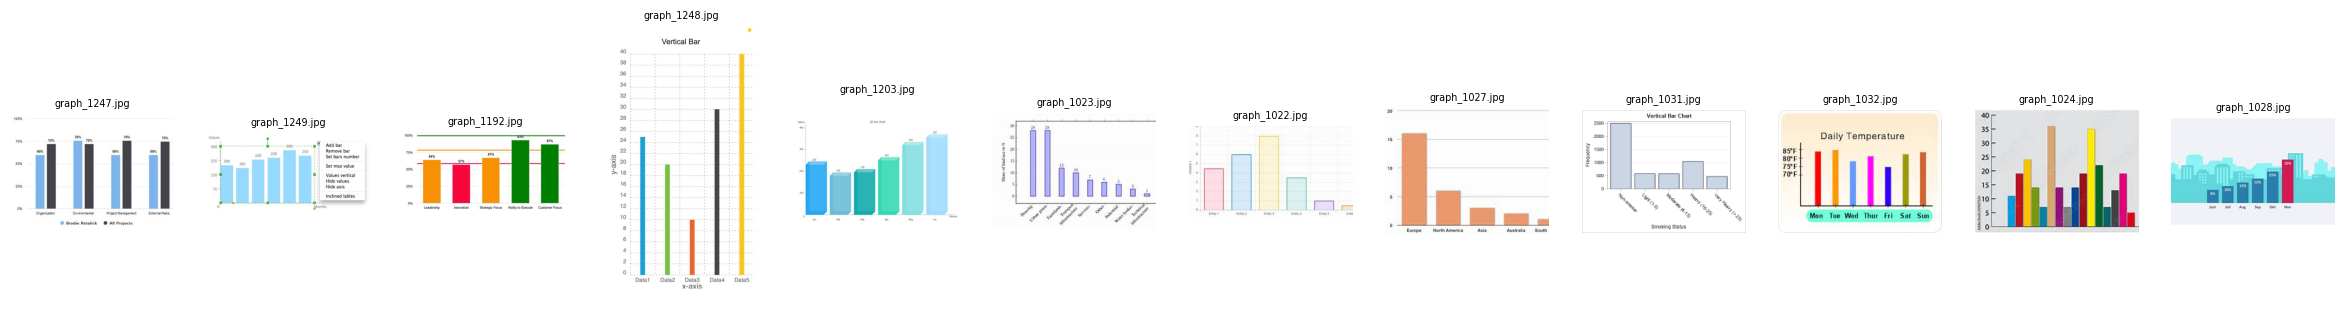

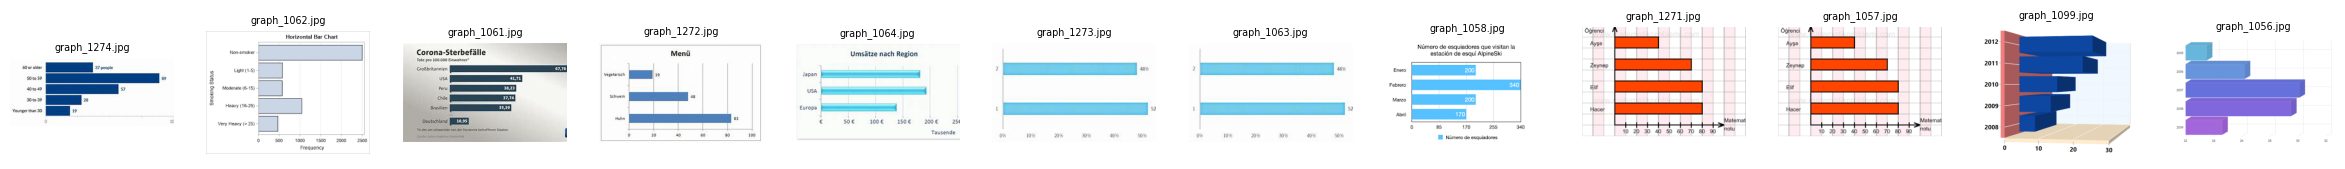

In [150]:
# 1000 Original images

original_v_bar_new_db.show_images_horizontally(12)
original_h_bar_new_db.show_images_horizontally(12)

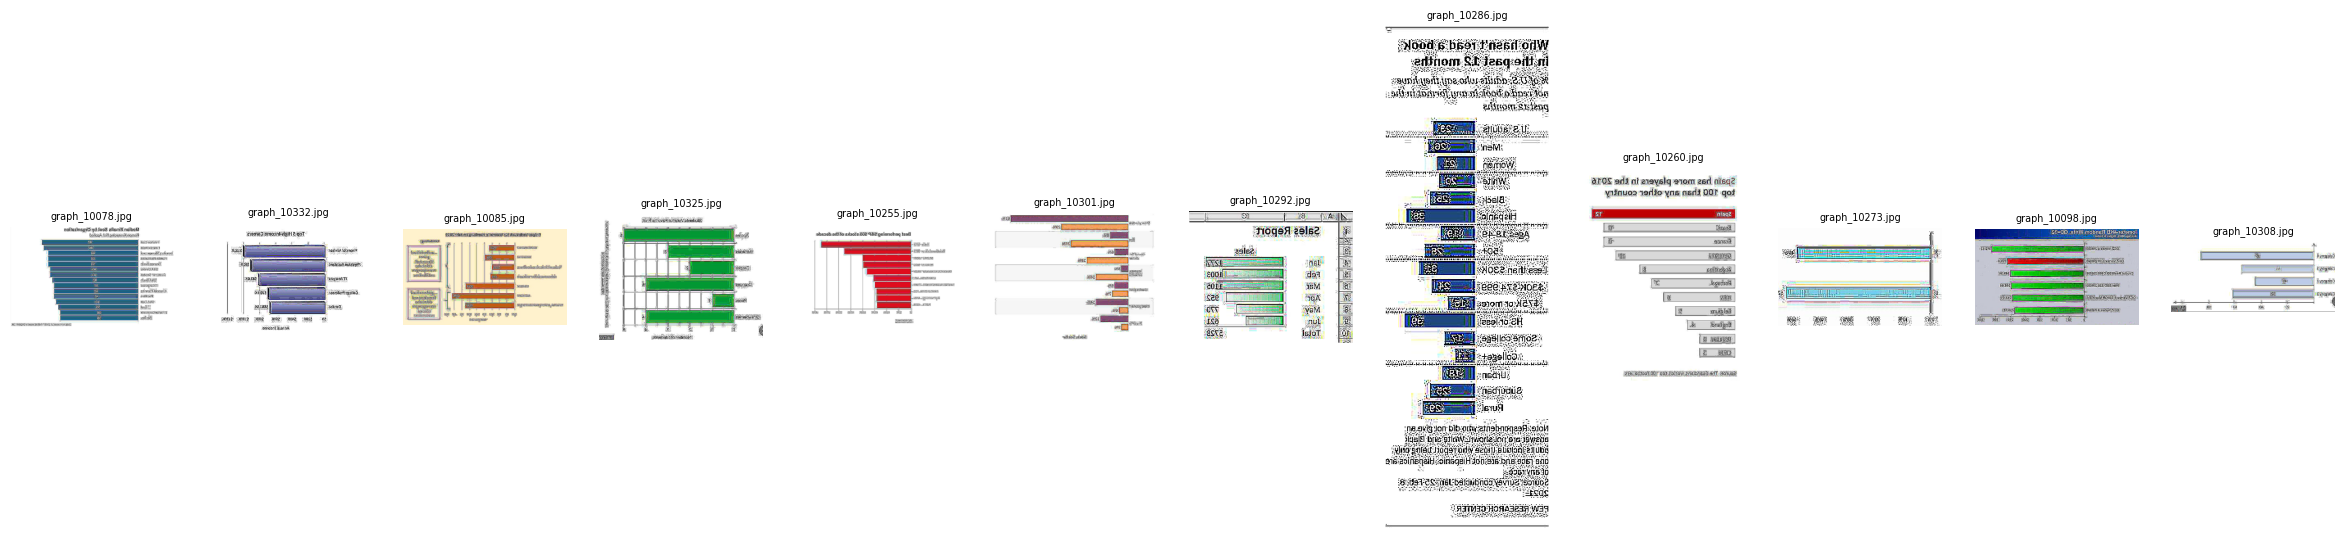

In [151]:
# 6000 Augmented images

augmented_bar_new_db.show_images_horizontally(12)

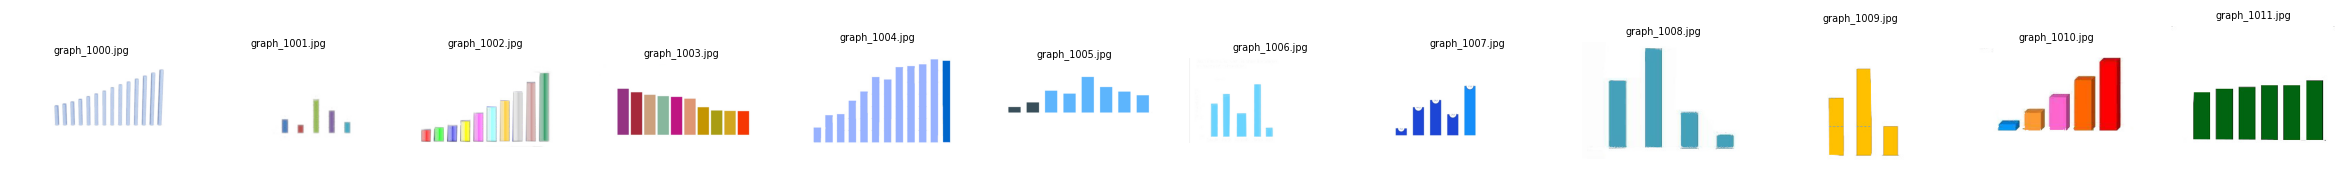

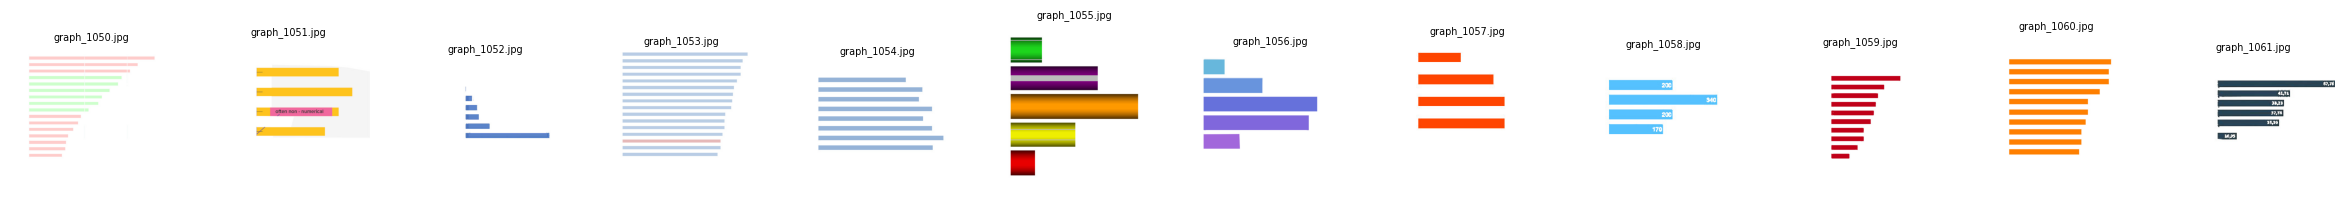

In [153]:
# 1000 Cropped images

cropped_v_bar_new_db.show_images_horizontally(12)
cropped_h_bar_new_db.show_images_horizontally(12)

## <b><FONT size="6" color='MidnightBlue '>Line Chart </FONT>

### <b><FONT size="5" color='MidnightBlue '>Important Paths </FONT>

In [156]:
# Originals
original_line_new_db = new_db.paths_info["Data Base/Originales/original_images_line_chart"]

# Augmented
augmented_line_new_db = new_db.paths_info["Data Base/Augmented/line_chart"]

# Cropped
cropped_line_new_db = new_db.paths_info["Data Base/Recortadas/line_chart"]

### <b><FONT size="5" color='MidnightBlue '>Data visualization </FONT>

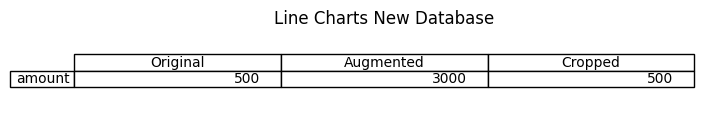

In [158]:
# Calculation of the total number of images
n_total_orig_line = original_line_new_db.n_imgs
n_total_augm_line = augmented_line_new_db.n_imgs
n_total_cropped_line = cropped_line_new_db.n_imgs

# Creation of the dataframe with the data
my_frame = pd.DataFrame(data={'Original':[n_total_orig_line],
                              'Augmented':[n_total_augm_line],
                              'Cropped':[n_total_cropped_line]},
                        index=['amount'])
title = "Line Charts New Database"

# Display pandas table
plot_table(my_frame, title= title)


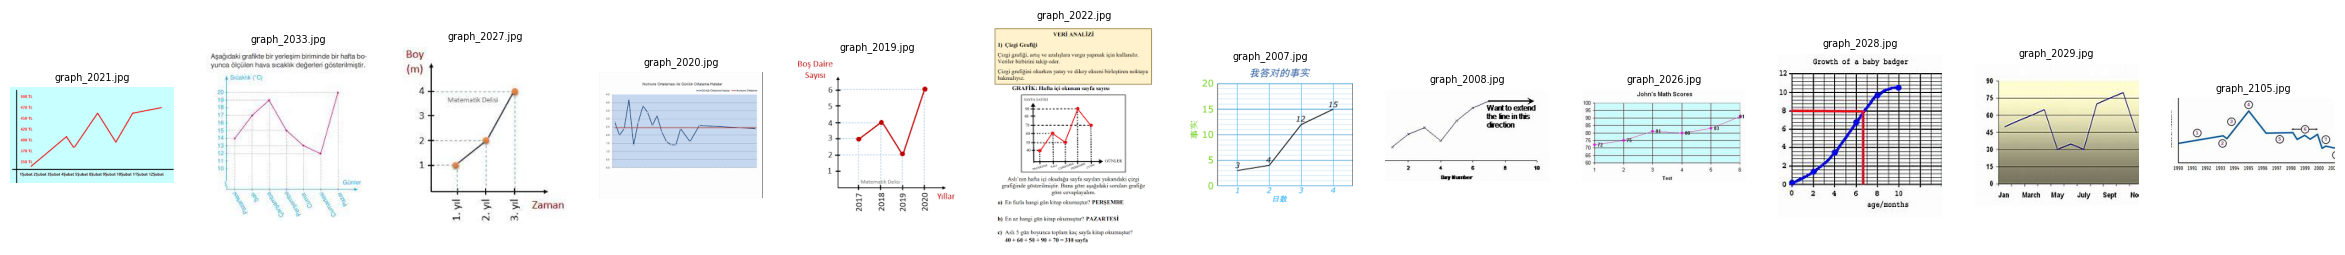

In [159]:
# 500 Original images

original_line_new_db.show_images_horizontally(12)

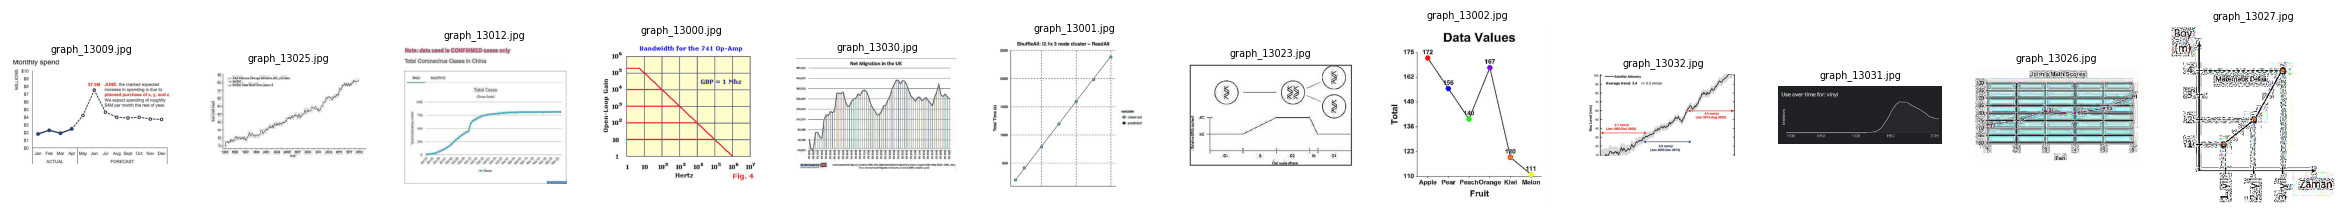

In [160]:
# 3000 Augmented images

augmented_line_new_db.show_images_horizontally(12)

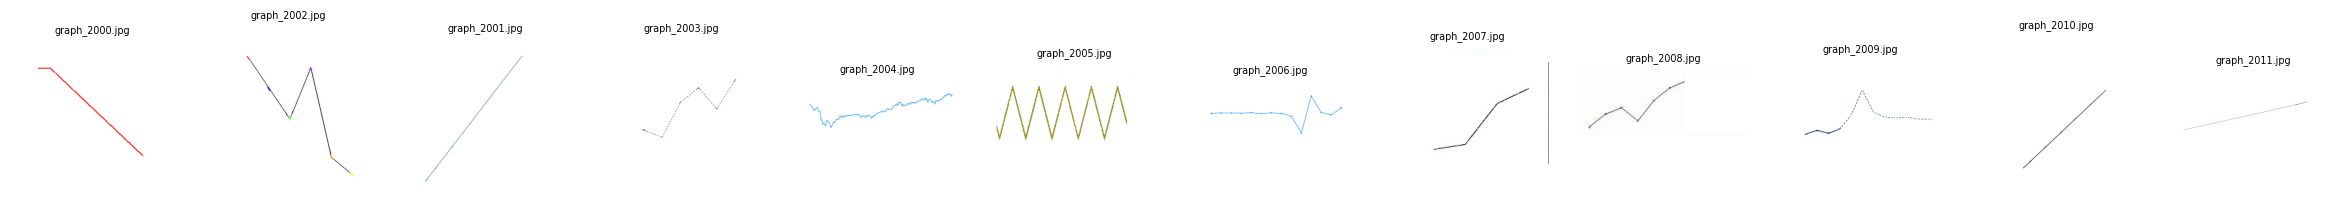

In [161]:
# 500 Cropped images

cropped_line_new_db.show_images_horizontally(12)

## <b><FONT size="6" color='MidnightBlue '>Pie Chart </FONT>

### <b><FONT size="5" color='MidnightBlue '>Important Paths </FONT>

In [164]:
# Originals
original_pie_new_db = new_db.paths_info["Data Base/Originales/original_images_pie_chart"]

# Augmented
augmented_pie_new_db = new_db.paths_info["Data Base/Augmented/pie_chart"]

# Cropped
cropped_pie_new_db = new_db.paths_info["Data Base/Recortadas/pie_chart"]

### <b><FONT size="5" color='MidnightBlue '>Data visualization </FONT>

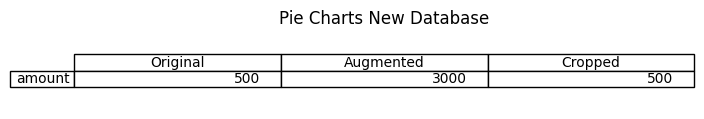

In [165]:
# Calculation of the total number of images
n_total_orig_pie = original_pie_new_db.n_imgs
n_total_augm_pie = augmented_pie_new_db.n_imgs
n_total_cropped_pie = cropped_pie_new_db.n_imgs

# Creation of the dataframe with the data
my_frame = pd.DataFrame(data={'Original':[n_total_orig_line],
                              'Augmented':[n_total_augm_line],
                              'Cropped':[n_total_cropped_line]},
                        index=['amount'])
title = "Pie Charts New Database"

# Display pandas table
plot_table(my_frame, title= title)


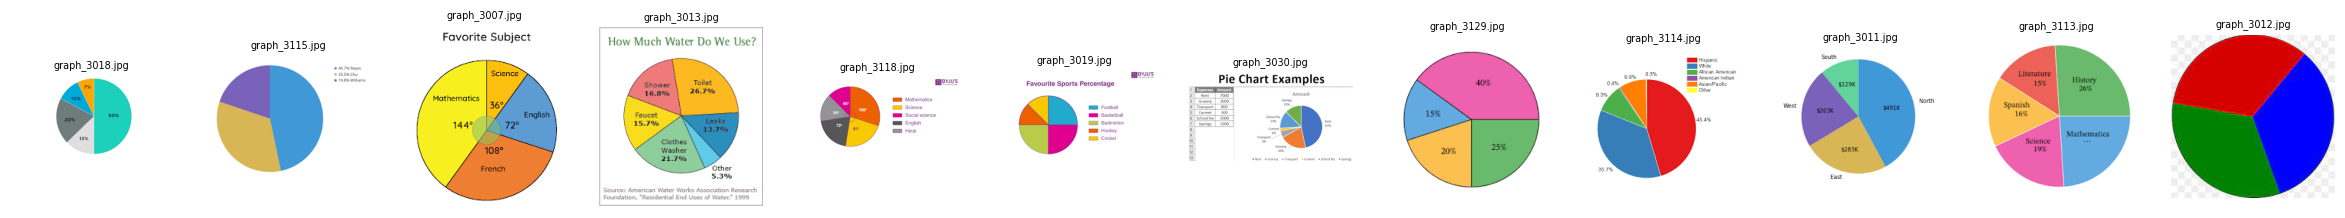

In [166]:
# 500 Original images

original_pie_new_db.show_images_horizontally(12)

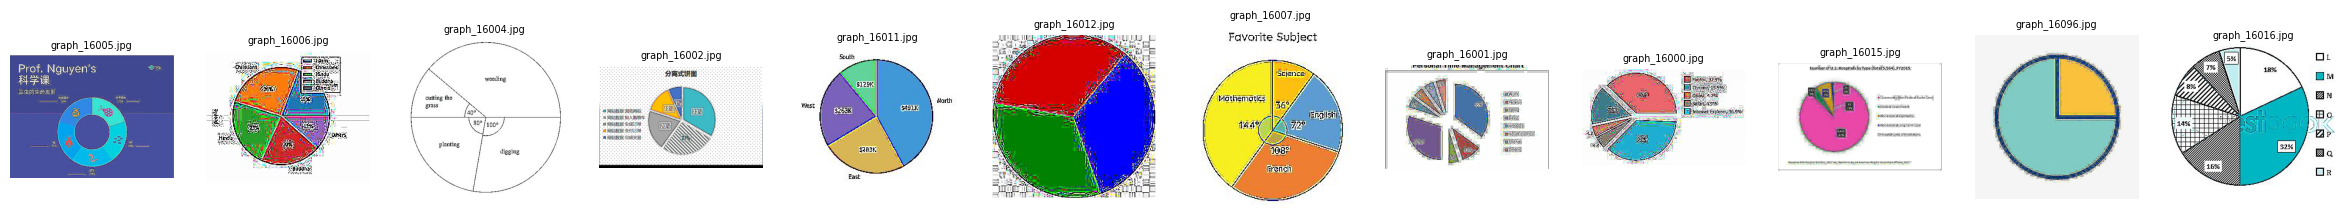

In [167]:
# 3000 Augmented images

augmented_pie_new_db.show_images_horizontally(12)

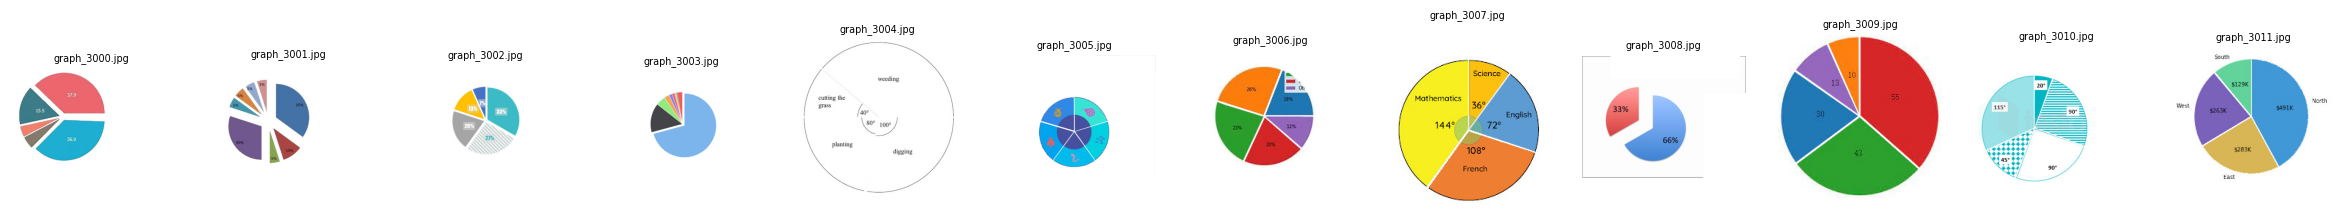

In [168]:
# 500 Cropped images

cropped_pie_new_db.show_images_horizontally(12)

<b></b>

# <b><FONT size="7" color='MidnightBlue '>Annexes </FONT>


## <b><FONT size="5" color='MidnightBlue '>Paths to images sets - Old Data Base </FONT>

### <b><FONT size="4" color='619b8a'>Path to bar chart images old dataset  </FONT>

In [ ]:
path_bar_ex_internet_good_old_db = 'Codigos y BD anteriores/Barras/ejemplos/internet/buenos'
path_bar_ex_internet_bad_old_db = 'Codigos y BD anteriores/Barras/ejemplos/internet/malos'
path_bar_ex_internet_regular_old_db = 'Codigos y BD anteriores/Barras/ejemplos/internet/regulares'

path_bar_ex_python_good_old_db = 'Codigos y BD anteriores/Barras/ejemplos/python/buenos'
path_bar_ex_python_bad_old_db = 'Codigos y BD anteriores/Barras/ejemplos/python/malos'
path_bar_ex_python_regular_old_db = 'Codigos y BD anteriores/Barras/ejemplos/python/regulares'

path_bar_internet_old_db = 'Codigos y BD anteriores/Barras/models/dataset/DB graficos internet'
path_bar_internet_vertical_old_db = 'Codigos y BD anteriores/Barras/models/dataset/DB graficos internet/Barras Verticales'
path_bar_internet_0_originales_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/0_originales'
path_bar_internet_1_grayscale_reshape_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/1_grayscale_reshape'
path_bar_internet_2_output_red_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/2_output_red'
path_bar_internet_3_threshold_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/3_threshold'
path_bar_internet_4_contornos_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/4_contornos'
path_bar_internet_5_contornos_sobre_original_old_db = 'Codigos y BD anteriores/Barras/models/dataset/internet/5_contornos_sobre_original'

path_bar_segm_2_train_binarias_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/binarias'
path_bar_segm_2_train_color_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/color'
path_bar_segm_2_train_grises_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/grises'
path_bar_segm_2_train_segmented_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/segmented'

path_bar_segm_2_test_binarias_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/binarias'
path_bar_segm_2_test_color_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/color'
path_bar_segm_2_test_grises_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/grises'
path_bar_segm_2_test_segmented_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/segmented'
path_bar_segm_2_test_output_1_grayscale_reshape_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/output/1_grayscale_reshape'
path_bar_segm_2_test_output_2_output_red_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/output/2_output_red'
path_bar_segm_2_test_output_3_threshold_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/output/3_threshold'
path_bar_segm_2_test_output_4_contornos_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/output/4_contornos'
path_bar_segm_2_test_output_5_contornos_sobre_original_old_db = 'Codigos y BD anteriores/Barras/models/dataset/segmentation-2/test/output/5_contornos_sobre_original'

### <b><FONT size="4" color='619b8a'>Path to line chart images old dataset  </FONT>

In [ ]:
path_line_matlab_out_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/matlab/out'
path_line_matlab_out_onepixel_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/matlab/out_onepixel'
path_line_matlab_pred_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/matlab/pred'
path_line_matlab_test_graficosfull_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/matlab/test/graficos-full'
path_line_matlab_test_graficossolo_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/matlab/test/graficos-solo'

path_line_python_out_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/python/out'
path_line_python_out_onepixel_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/python/out_onepixel'
path_line_python_pred_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/python/pred'
path_line_python_test_graficosfull_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/python/test/graficos-full'
path_line_python_test_graficossolo_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/python/test/graficos-solo'

path_line_realnew_out_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/real_new/out'
path_line_realnew_out_onepixel_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/real_new/out_onepixel'
path_line_realnew_pred_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/real_new/pred'
path_line_realnew_test_graficosfull_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/real_new/test/graficos-full'
path_line_realnew_test_graficossolo_old_db = 'Codigos y BD anteriores/Lineas/test_procesado/real_new/test/graficos-solo'

## <b><FONT size="5" color='MidnightBlue '>Paths to images sets - New Data Base </FONT>

### <b><FONT size="4" color='619b8a'>Path to bar chart images new dataset  </FONT>

In [ ]:
path_bar_aug_new_db = 'Data Base/Augmented/bar_chart'
path_bar_orig_new_db = 'Data Base/Originales/original_images_bar_chart'
path_bar_cut_h_new_db = 'Data Base/Recortadas/h_bar_chart'
path_bar_cut_v_new_db = 'Data Base/Recortadas/v_bar_chart'

### <b><FONT size="4" color='619b8a'>Path to line chart images new dataset  </FONT>

In [ ]:
path_line_aug_new_db = 'Data Base/Augmented/line_chart'
path_line_orig_new_db = 'Data Base/Originales/original_images_line_chart'
path_line_cut_new_db = 'Data Base/Recortadas/line_chart'

### <b><FONT size="4" color='619b8a'>Path to pie chart images new dataset  </FONT>

In [ ]:
path_pie_aug_new_db = 'Data Base/Augmented/pie_chart'
path_pie_orig_new_db = 'Data Base/Originales/original_images_pie_chart'
path_pie_cut_new_db = 'Data Base/Recortadas/pie_chart'

# <b><FONT size="7" color='MidnightBlue '>Trash </FONT>


## <b><FONT size="5" color='MidnightBlue '>Gridspec </FONT>

In [ ]:
def print_matrix_images(path, amount, n_row=2, n_col=3, random=True)
    description = 'Size: %s, #Samples: %s, Computation Time: %ss'%(25, 13, int(12.5))
    title_fontsize = 'x-small'
    fig = plt.figure(dpi=300, tight_layout=True)
    fig.set_size_inches(8.27, 11.69, forward=True)

    plt.figtext(0.02, .99, description, fontsize = 'small')

    ax = np.zeros(9, dtype=object)
    gs = fig.add_gridspec(5, 3, height_ratios=[3,2,3,2,2])
    ax[0] = fig.add_subplot(gs[0, 0])
    ax[1] = fig.add_subplot(gs[0, 1])
    ax[2] = fig.add_subplot(gs[0, 2])
    ax[3] = fig.add_subplot(gs[1, 0])
    ax[4] = fig.add_subplot(gs[1, 1])
    ax[5] = fig.add_subplot(gs[1, 2])

    ax[0].imshow(img)
    ax[0].set_title('Slice through Covariance Operator', fontsize = title_fontsize)

    ax[1].imshow(img)
    ax[1].set_title('Last Sample', fontsize = title_fontsize)

    ax[2].imshow(img)
    ax[2].set_title('Truth', fontsize = title_fontsize)

    ax[3].imshow(img)
    ax[3].set_title('Slice through Covariance Operator', fontsize = title_fontsize)

    ax[4].imshow(img)
    ax[4].set_title('Last Sample', fontsize = title_fontsize)

    ax[5].imshow(img)
    ax[5].set_title('Truth', fontsize = title_fontsize)

    # imgs_to_print =

    # stations = x_train_analyse[['SO2_HRI-1', 'SO2_HVH-1', 'SO2_STA-1','SO2_CAU-1','SO2_GOR-1','SO2_HAR-1']]

    # gs = GridSpec(2, 3)

    # keys = stations.keys()
    # fig = plt.figure(figsize=(30, 10))
    # ax = [fig.add_subplot(pos) for pos in [gs[0, 0], gs[0, 1], gs[0, 2],
    #                                     gs[1, 0], gs[1, 1], gs[1, 2]]]

    # i = 0
    # x = stations.index
    # y_sortie = y_train_analyse["SO2_MAS+0"]

    # for k in keys[:6]:
    #     y = stations[k]
    #     # First subplot
    #     ax[i].plot(x, y, color='black', label=k)
    #     ax[i].plot(x, y_sortie, color='yellow', alpha=0.7, label="SO2_MAS-0")
    #     ax[i].grid()
    #     ax[i].set_xlabel("temps")
    #     ax[i].set_ylabel("μg/m³")
    #     ax[i].set_title(k)
    #     ax[i].legend()
    #     i += 1

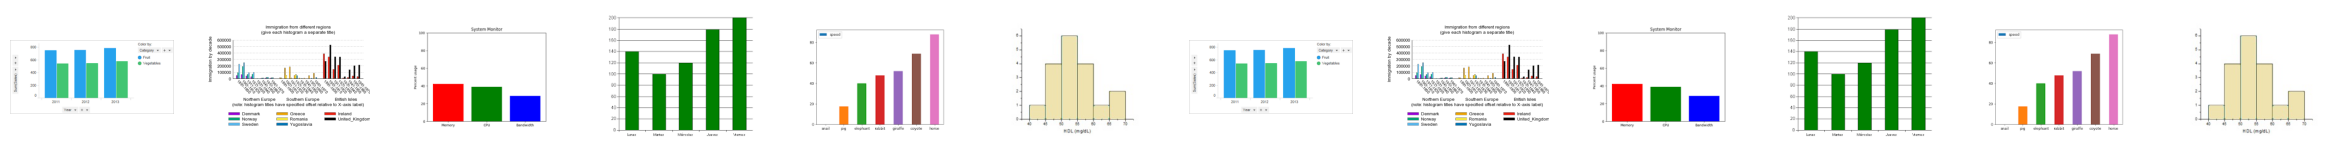

In [ ]:
def show_images_horizontally2(list_of_files):
    gs = GridSpec(1, 12)


    fig = plt.figure(figsize=(30, 10))
    ax = [fig.add_subplot(pos) for pos in [gs[0, 0], gs[0, 1], gs[0, 2],
                                        gs[0, 3], gs[0, 4], gs[0, 5], gs[0, 6], gs[0, 7], gs[0, 8],
                                        gs[0, 9], gs[0, 10], gs[0, 11]]]

    i = 0
    # x = stations.index
    # y_sortie = y_train_analyse["SO2_MAS+0"]

    for k in list_of_files:
        image = imread(list_of_files[i])
        ax[i].imshow(image,cmap='Greys_r')
        ax[i].axis('off')
        i += 1

img1 = "Codigos y BD anteriores/Barras/models/dataset/DB graficos internet/graph_1502.jpg"
img2 = "Codigos y BD anteriores/Barras/models/dataset/DB graficos internet/graph_1312.jpg"
img3 = "Codigos y BD anteriores/Barras/models/dataset/DB graficos internet/graph_1459.jpg"
img4 = "Codigos y BD anteriores/Barras/models/dataset/DB graficos internet/graph_1103.jpg"
img5 = "Codigos y BD anteriores/Barras/models/dataset/DB graficos internet/graph_1439.jpg"
img6 = "Codigos y BD anteriores/Barras/models/dataset/DB graficos internet/graph_1306.jpg"
lista= [img1,img2,img3,img4,img5,img6,img1,img2,img3,img4,img5,img6]
show_images_horizontally2(lista)

In [ ]:
gs = GridSpec(2, 3)

keys = stations.keys()
fig = plt.figure(figsize=(30, 10))
ax = [fig.add_subplot(pos) for pos in [gs[0, 0], gs[0, 1], gs[0, 2],
                                    gs[1, 0], gs[1, 1], gs[1, 2]]]

i = 0
x = stations.index
y_sortie = y_train_analyse["SO2_MAS+0"]

for k in keys[:6]:
    y = stations[k]
    # First subplot
    ax[i].plot(x, y, color='black', label=k)
    ax[i].plot(x, y_sortie, color='yellow', alpha=0.7, label="SO2_MAS-0")
    ax[i].grid()
    ax[i].set_xlabel("temps")
    ax[i].set_ylabel("μg/m³")
    ax[i].set_title(k)
    ax[i].legend()
    i += 1

In [ ]:
path_testt = "Codigos y BD anteriores/Barras/models/dataset/DB graficos internet"
files = os.listdir(path_testt)
files = [f for f in files if os.path.isfile(path_testt+'/'+f)]  # Filtering only the files.
print(*files, sep="\n")

graph_1502.jpg
graph_1312.jpg
graph_1459.jpg
graph_1103.jpg
graph_1439.jpg
graph_1306.jpg
graph_1365.jpg
graph_1221.jpg
graph_1273.jpg
graph_1393.jpg
graph_1476.jpg
graph_1425.jpg
graph_1296.jpg
graph_1042.jpg
graph_1544.jpg
graph_1277.jpg
graph_1226.jpg
graph_1464.jpg
graph_1523.jpg
graph_1223.jpg
graph_1417.jpg
graph_1257.jpg
graph_1533.jpg
graph_1243.jpg
graph_1259.jpg
graph_1368.jpg
graph_1427.jpg
graph_1113.jpg
graph_1440.jpg
graph_1426.jpg
graph_1055.jpg
graph_1437.jpg
graph_1229.jpg
graph_1391.jpg
graph_1151.jpg
graph_1542.jpg
graph_1147.jpg
graph_1087.jpg
graph_1009.jpg
graph_1516.jpg
graph_1261.jpg
graph_1488.jpg
graph_1173.jpg
graph_1266.jpg
graph_1345.jpg
graph_1086.jpg
graph_1265.jpg
graph_1293.jpg
graph_1005.jpg
graph_1231.jpg
graph_1227.jpg
graph_1351.jpg
graph_1532.jpg
graph_1135.jpg
graph_1415.jpg
graph_1453.jpg
graph_1164.jpg
graph_1278.jpg
graph_1057.jpg
graph_1235.jpg
graph_1185.jpg
graph_1077.jpg
graph_1073.jpg
graph_1342.jpg
graph_1378.jpg
graph_1016.jpg
graph_1074

In [ ]:
data = {'product_name': ['laptop', 'printer', 'tablet', 'desk', 'chair'],
        'price': [1200, 150, 300, 450, 200]
        }

df = pd.DataFrame(data, index=['product_1', 'product_2', 'product_3', 'product_4', 'product_5'])

df.style.set_table_attributes("style='display:inline'").set_caption('Caption table')
df

,product_name,price
product_1,laptop,1200
product_2,printer,150
product_3,tablet,300
product_4,desk,450
product_5,chair,200


In [ ]:
# Testing

path_check = "Codigos y BD anteriores/Barras/models/dataset/segmentation-2/train/grises"
imgs = search_imgs(path_check)
imgs.sort()
for img in imgs:
    if "(" in img:
        print(img)

3258(1).png


In [ ]:
def search_imgs(path):
    """
    Function that receives a path and returns all the images of type jpg,
    jpeg or png found in that path as a list.
    Solves the problem of automatic synchronization of mac 'dot dash' files.

    Parameters
    ----------
    path : string
        Path to the files.

    Returns
    -------
    list
        List with the names of all images in 'path'.
    """
    extensions = ('.png', '.jpg', '.jpeg')
    imgs_list = list()
    imgs_list_tmp = os.listdir(path)
    for file in imgs_list_tmp:  # TODO: optimize complexity
        if file.endswith(extensions):
            imgs_list.append(file)
    return imgs_list

In [ ]:
def amount_images(path):
    imgs = search_imgs(path)
    return len(imgs)

In [ ]:
def path_dir_info(path):
    imgs_path = search_imgs(path)
    if imgs_path:
        imgs_path_extension_set = set([img_name.split(".")[-1] for img_name in imgs_path])
        text = f"The path     {bold(path):110s} have {len(imgs_path):5} images of {', '.join(set(imgs_path_extension_set)):4s} extension."
        print(text)

In [ ]:
def amount_images_dir(path):
    imgs_path = search_imgs(path)
    if imgs_path:
        imgs_path_extension_set = set([img_name.split(".")[-1] for img_name in imgs_path])
        text = f"The path     {bold(path):110s} have {len(imgs_path):5} images of {', '.join(set(imgs_path_extension_set)):4s} extension."
        print(text)

In [ ]:
def list_dirs(rootdir):
    subdirs = [x[0] for x in os.walk(rootdir)]
    return subdirs

In [ ]:
def show_images_horizontally(path, n=6, random=False):
    imgs = search_imgs(path)  # all images in the path
    imgs_selected = dict()
    # Verify if n is less than 12
    if n > 12:
        print("n has to be less than 12.")
        return
    # Find images
    if random:
        ids_random = random.sample(range(len(imgs)), n)

        for i in ids_random:
            imgs_selected[imgs[i]] = path_ + imgs[i]
    else:
        path_ = path + "/" if path[-1] != "/" else path  # adding / if necessary
        for i in range(n):
            imgs_selected[imgs[i]] = path_ + imgs[i]

    title_fontsize = 'x-small'
    fig = figure(figsize=(30, 10))

    number_of_files = len(imgs_selected.items())
    i = 0
    for img_name, img_path in imgs_selected.items():
        a = fig.add_subplot(1, number_of_files, i+1)
        image = imread(img_path)
        imshow(image, cmap='Greys_r')
        a.set_title(img_name, fontsize=title_fontsize)
        axis('off')
        i += 1